In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [10]:
from google.colab import files 
uploaded= files.upload ()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


In [11]:
data=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [12]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


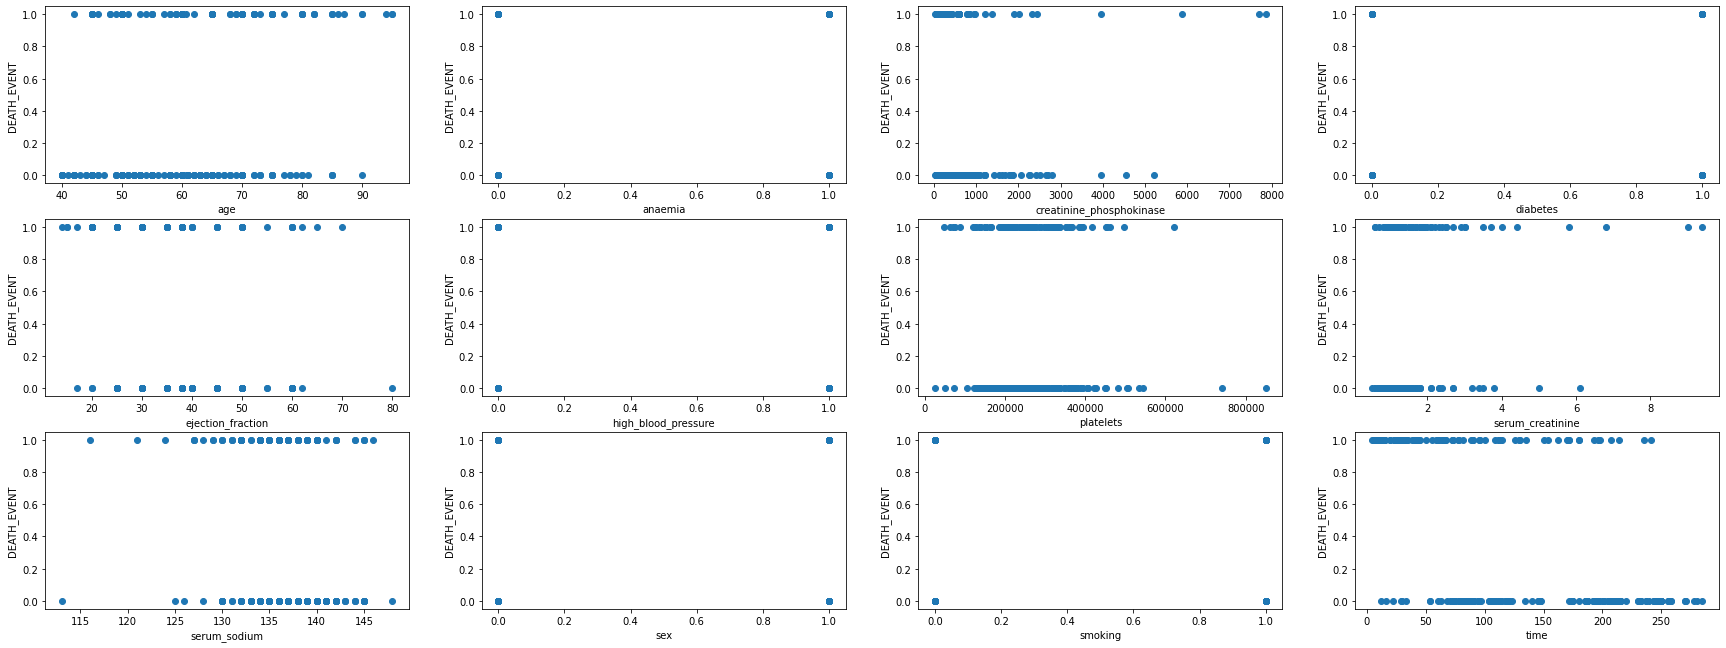

In [23]:
plt.figure(figsize=(30,15))
for i,j in enumerate(data.columns[:-1]):
    plt.subplot(4,4,i+1)
    plt.scatter(data[j],data["DEATH_EVENT"])
    plt.xlabel(j)
    plt.ylabel("DEATH_EVENT")
plt.show()

In [24]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
Y = data["DEATH_EVENT"]
X = data.drop(columns=["DEATH_EVENT"])
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [26]:
X

,const,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,1.0,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,1.0,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,1.0,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,1.0,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270
295,1.0,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271
296,1.0,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278
297,1.0,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280


In [27]:
model_linear = sm.OLS(Y, X).fit() # Ordinary Least Square
predictions_SM = model_linear.predict(X) 

In [28]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            DEATH_EVENT   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     17.04
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           2.35e-27
Time:                        22:31:15   Log-Likelihood:                -115.90
No. Observations:                 299   AIC:                             257.8
Df Residuals:                     286   BIC:                             305.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        1.6636      0.695      2.392      0.017       0.295       3.032
age                          0.0058      0.002      3.088      0.002       0.002       0.009
anaemia                     -0.0028      0.044     -0.062      0.950      -0.090       0.085
creatinine_phosphokinase  3.427e-05   2.25e-05      1.525      0.128   -9.96e-06    7.85e-05
diabetes                     0.0193      0.044      0.437      0.662      -0.068       0.106
ejection_fraction           -0.0098      0.002     -5.333      0.000      -0.013      -0.006
high_blood_pressure         -0.0143      0.046     -0.313      0.754      -0.104       0.076
platelets                 -8.37e-08   2.21e-07     -0.379      0.705   -5.18e-07    3.51e-07
serum_creatinine             0.0853      0.021      4.017      0.000       0.043       0.127
serum_sodium                -0.0076      0.005     -1.513      0.131      -0.017       0.002
sex                         -0.0637      0.051     -1.247      0.214      -0.164       0.037
smoking                     -0.0057      0.051     -0.112      0.911      -0.106       0.095
time                        -0.0027      0.000     -9.415      0.000      -0.003      -0.002
==============================================================================
Omnibus:                       10.068   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.014
Skew:                           0.306   Prob(JB):                       0.0182
Kurtosis:                       2.483   Cond. No.                     9.26e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

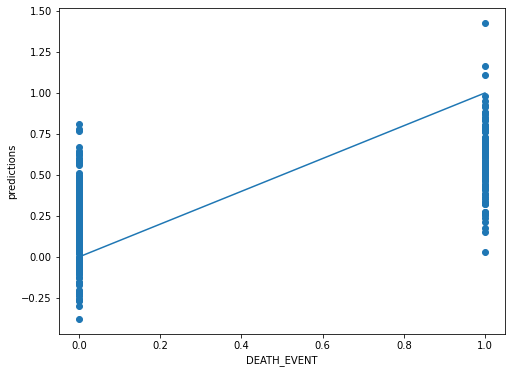

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(data["DEATH_EVENT"],predictions_SM)
u=np.linspace(data["DEATH_EVENT"].min(),data["DEATH_EVENT"].max(),5)
plt.plot(u,u)
plt.xlabel("DEATH_EVENT")
plt.ylabel("predictions")
plt.show()

In [30]:
rmse=np.sqrt(np.mean((data["DEATH_EVENT"]-predictions_SM)**2))
print("RMSE del modelo es",rmse)

RMSE del modelo es 0.3565395690055793


In [31]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [36]:
features=data.drop(columns=["DEATH_EVENT"])
target=data["DEATH_EVENT"]
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.00001, random_state = 42)

In [37]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)
prediction_LR =  LR.predict(x_test)
prediction_LR

array([0.14038813])

In [38]:
predictions_LR=LR.predict(features)

Feature: 0, Score: 0.00580
Feature: 1, Score: -0.00345
Feature: 2, Score: 0.00003
Feature: 3, Score: 0.01891
Feature: 4, Score: -0.00982
Feature: 5, Score: -0.01457
Feature: 6, Score: -0.00000
Feature: 7, Score: 0.08590
Feature: 8, Score: -0.00759
Feature: 9, Score: -0.06411
Feature: 10, Score: -0.00408
Feature: 11, Score: -0.00272


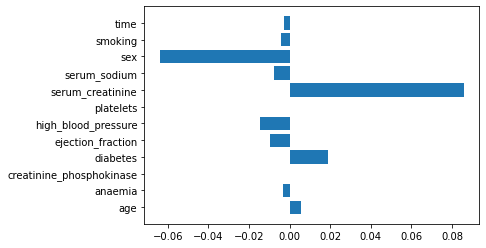

In [39]:
# get importance
var=LR.feature_names_in_
importance = LR.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.barh(var, importance)
plt.show()

In [40]:
important=pd.DataFrame({"variable":var,"importance":importance})

In [41]:
important.sort_values(by="importance")

,variable,importance
9,sex,-6.410666e-02
5,high_blood_pressure,-1.456855e-02
4,ejection_fraction,-9.822932e-03
8,serum_sodium,-7.591341e-03
10,smoking,-4.083638e-03
1,anaemia,-3.447774e-03
11,time,-2.721658e-03
6,platelets,-9.427195e-08
2,creatinine_phosphokinase,3.428734e-05
0,age,5.801661e-03


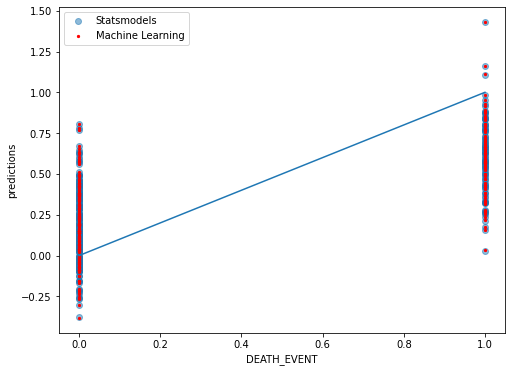

In [42]:
plt.figure(figsize=(8,6))
plt.scatter(data["DEATH_EVENT"],predictions_SM, label="Statsmodels",alpha=0.5)
plt.scatter(data["DEATH_EVENT"],predictions_LR, label="Machine Learning",s=5,c="r")
u=np.linspace(data["DEATH_EVENT"].min(),data["DEATH_EVENT"].max(),5)
plt.plot(u,u)
plt.xlabel("DEATH_EVENT")
plt.ylabel("predictions")
plt.legend()
plt.show()

In [43]:
LR2 = LinearRegression(fit_intercept=False)
# fitting the training data
LR2.fit(x_train,y_train)
predictions_LR2=LR2.predict(features)

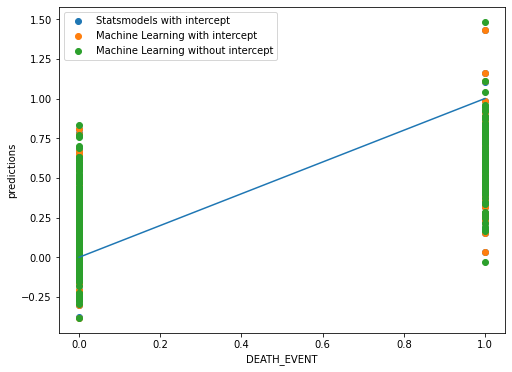

In [44]:
plt.figure(figsize=(8,6))
plt.scatter(data["DEATH_EVENT"],predictions_SM, label="Statsmodels with intercept")
plt.scatter(data["DEATH_EVENT"],predictions_LR, label="Machine Learning with intercept")
plt.scatter(data["DEATH_EVENT"],predictions_LR2, label="Machine Learning without intercept")
u=np.linspace(data["DEATH_EVENT"].min(),data["DEATH_EVENT"].max(),5)
plt.plot(u,u)
plt.xlabel("DEATH_EVENT")
plt.ylabel("predictions")
plt.legend()
plt.show()